In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [19]:
x = symbols('x')

In [20]:
f = (sin(x) + cos(x)) ** 3 / ln(4 + x)
f

(sin(x) + cos(x))**3/log(x + 4)

Часть 1

In [86]:
x_0 = 0.5
x_m = 3
m = 15

In [87]:
X = [0] * (m + 1)
Y = [0] * (m + 1)
for k in range(m + 1):
    X[k] = (x_0 + (x_m - x_0) * k / m)
    Y[k] = f.subs(x, X[k])
    print("x: {}".format(X[k]), "f(x): {}".format(Y[k]))

x: 0.5 f(x): 1.66141120700702
x: 0.6666666666666666 f(x): 1.79760241608739
x: 0.8333333333333333 f(x): 1.78903616314335
x: 1.0 f(x): 1.63921588273896
x: 1.1666666666666665 f(x): 1.37729510334428
x: 1.3333333333333335 f(x): 1.05090115935732
x: 1.5 f(x): 0.715050586559032
x: 1.6666666666666667 f(x): 0.419827592218295
x: 1.8333333333333333 f(x): 0.199706293646165
x: 2.0 f(x): 0.0669358778635805
x: 2.166666666666667 f(x): 0.0103964227380373
x: 2.333333333333333 f(x): 0.0000183035441998036
x: 2.5 f(x): -0.00444752004102781
x: 2.6666666666666665 f(x): -0.0425127418362514
x: 2.8333333333333335 f(x): -0.142544853754487
x: 3.0 f(x): -0.314343578270871


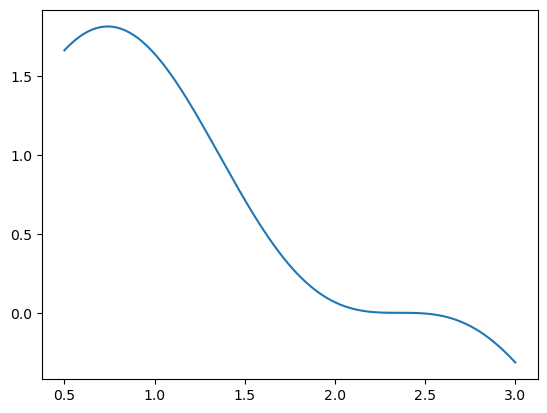

In [88]:
fx = lambdify(x, f, modules = ['numpy'])
x_vals = np.linspace(x_0, x_m, 1000)
plt.plot(x_vals, fx(x_vals))

In [89]:
Q = 0
t = symbols('t')
for k in range(0, m + 1):
    l = 1
    for i in range(0, m + 1):
        if i != k:
            l = l * ((t - X[i]) / (X[k] - X[i]))
    Q = Q + l * Y[k]

In [90]:
expand(Q)

-3.10697259253701e-7*t**15 + 2.34838652986014e-5*t**14 - 0.000468425303040476*t**13 + 0.00449159034906188*t**12 - 0.0243478470147238*t**11 + 0.079522119514877*t**10 - 0.171837107220199*t**9 + 0.334326506475918*t**8 - 0.689960042829625*t**7 + 0.768932653358206*t**6 + 0.369705187331419*t**5 - 0.527509730774909*t**4 - 2.02365523026674*t**3 + 0.771426842402434*t**2 + 2.02660000782544*t + 0.721966052346829

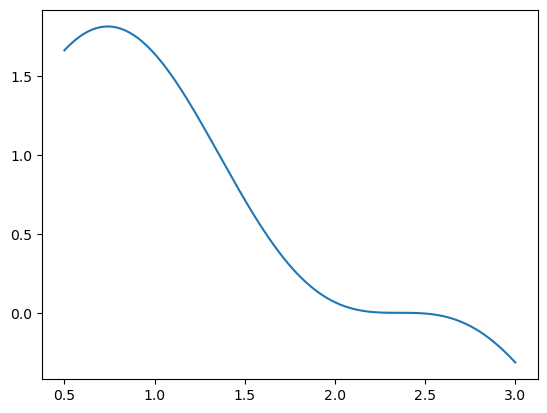

In [91]:
Qt = lambdify(t, Q, modules = ['numpy'])
t_vals = np.linspace(x_0, x_m, 1000)
plt.plot(t_vals, Qt(t_vals))

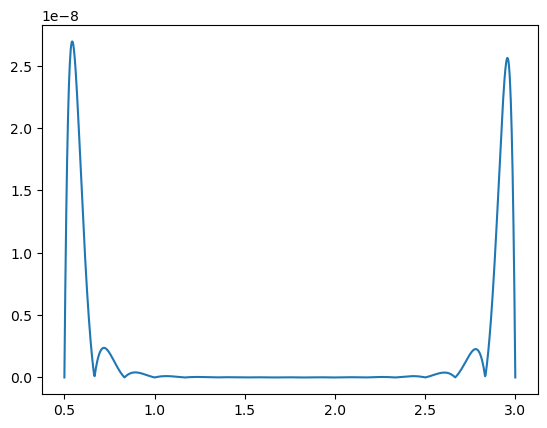

In [92]:
err = lambdify(t, abs(f.subs(x, t) - Q), modules = ['numpy'])
plt.plot(t_vals, err(t_vals))

In [93]:
M = max([abs(f.subs(x, t) - Q).subs(t, i) / abs(f).subs(x, i) for i in t_vals])
M

0.0669370265623333

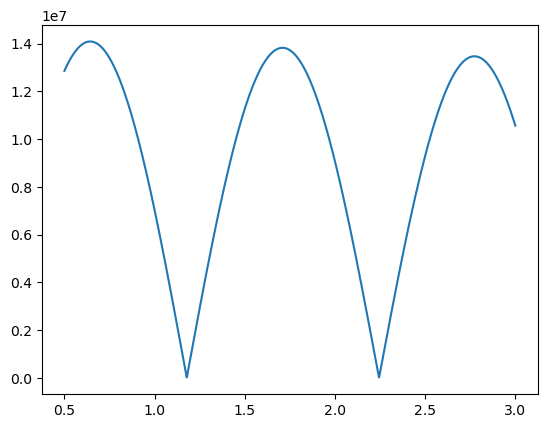

In [95]:
derr = lambdify(x, abs(diff(f, (x, m + 1))), modules = ['numpy'])
plt.plot(x_vals, derr(x_vals))

In [98]:
M = max(derr(x_vals))
M

14084989.18340599

In [99]:
err_max = lambdify(x, M / factorial(m + 1) * abs(prod([(x - X[k]) for k in range(0, m + 1)])), modules = ['numpy'])

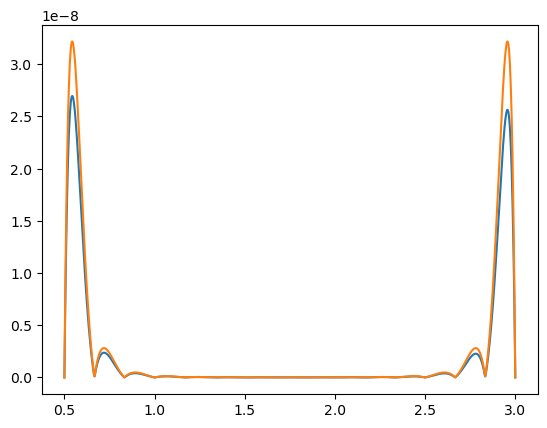

In [100]:
plt.plot(x_vals, err(x_vals))
plt.plot(x_vals, err_max(x_vals))

Часть 2